# Ecuación de reacción-difusión (RD)

\begin{align}
    \partial_t u &= d \Delta u + uv - au\\
    \partial_t v &= \Delta v - uv
\end{align}

En este primer intento tomamos $a=d=1$


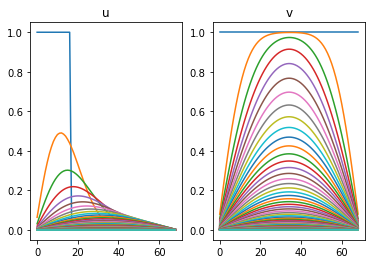

In [1]:
from RDsolver import*


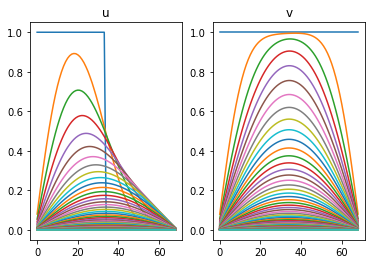

In [2]:
Nt = 10000
L = 10
N = int(np.sqrt(Nt / 2))
dx = L / N
f_init = lambda t: t < L/2
#u0 = 1 / (1 + np.exp(-np.arange(-L, L + dx, dx)**2))
u0 = f_init(np.arange(0, L + dx, dx))
v0 = np.ones(N + 1)
a_1 = 1
a_2 = 1
d = 1
a = lambda u,v: 1 / ( (1 + u / a_1) * (1 + v / a_2) )
solver = RDsolver(L, Nt, N, u0, v0, d, a)
solver.solve()
solver.plot()

In [3]:
from scipy import sparse

In [5]:
sparse.kron(np.eye(3), np.eye(3)).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
(sparse.eye(3) + sparse.eye(3)).toarray()

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

# RDsolver2D test

Se busca resolver

\begin{align}
    \partial_t u &= d \Delta u + uv - a(u,v)\\
    \partial_t v &= \Delta v - uv\\
    \partial_t w &= a(u, v)
\end{align}

El esquema de la discretización es similiar para $u$ y $v$, veamos el de $u$:

\begin{align}
    \frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} &= \frac{d}{h^2} (u_{i+1,j}^n-2u_{i,j}^n + u_{i-1,j}^n + u_{i,j+1}^n-2u_{i,j}^n + u_{i,j-1}^n) + c(u_{i,j}^n,u_{i,j}^n)\\
    u_{i,j}^0 &= u_0(i,j)\\
    u_{i,j}^n &= 0,\ (i,j)\in \partial \Omega 
\end{align}

Para $v$ es lo mismo pero sin $d$ y con otra no linealidad $c$ que no se discretiza solo se evalua en la solución del tiempo anterior. La matríz del esquema es de $N^2 \times N^2$

\begin{align}
    A(x) &= \delta(x) trid(I, A(x), I)\\
    \delta(u) &= d\alpha\\
    \delta(v) &= \alpha
\end{align}

con $trid(a,b,c)$ denota una matriz tridiagonal con $a, b, c$ los parámetros que van en cada diagonal. y $A(u)=trid(1, 1-4\delta(u),1)$

In [16]:
from RDsolver2D import *